#EE353: Assignment-2
#Sanjay Meena
#22B3978
#Video Link:-https://drive.google.com/file/d/1fMKKIDTOeWEsIZytUNH6ebGHexR7VTfJ/view?usp=sharing

# 1. Write a function to generate an input data matrix X of size NxD for regression.
#Approach:-
Step 1: Creating a random matrix R of size NxM where each column follows a standard normal distribution. This can be done using numpy.random.randn(), which generates random values from a normal distribution.

Step 2: Performing matrix multiplication between R (size NxM) and S (size MxD). In numpy, this can be done using the @ operator or np.dot().

Step 3: Return the resulting matrix X, which will have the desired size NxD.

In [53]:
import numpy as np  # Import numpy for matrix operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import pandas as pd  # Import pandas for data manipulation and analysis
import seaborn as sns  # Import seaborn for data visualization

In [54]:
def data_matrix(N,D):#function to generate an input data matrix X(NxD)
   M,D = S.shape  # Extract the dimensions of the generator matrix S
   Random = np.random.randn(N, M)  # NxM random matrix with standard normal distribution
   X = np.dot(Random,S)  # Matrix multiplication to generate the output matrix X
   return X  # Return the generated input data matrix X

In [55]:
# Sample data
N = 6  # Sample size (number of rows)
S = np.eye(4)  # Take generator matrix S as an identity matrix of size 4x4


In [56]:
#Generte matrix using our function
X = data_matrix(N, S)  # Generate the matrix X using the function
print(X)  # Output the matrix X

[[ 0.4219223   0.47009556  2.12539128  1.29395168]
 [-0.81719405 -1.07963832 -1.16682891 -0.27998976]
 [-0.3507222  -2.20163749 -0.65710349  1.44640161]
 [-0.39981105 -0.52980256 -1.7418416  -1.8494593 ]
 [-0.10790192 -0.23077348 -0.10950906  1.82197898]
 [ 0.63448666  0.23221909 -0.0813656  -1.53134042]]


#2. Write a function to generate the target vector t of size Nx1
#Approach:-

a. Multiplying the data matrix X (NxD) with the weight vector w[:-1] (D), which represents the feature weights.

b. Adding the bias (last element of w, i.e., w[-1]) to every sample (every row of X).

c. Generating zero-mean Gaussian noise using np.random.normal with a mean of 0 and standard deviation sqrt(σ) and add it to the resulting vector.

In [57]:
#def function to Generates the target vector t of size Nx1 for regression.
def target_vector(X,W,sigma):
    N, D = X.shape  # Get the dimensions of the data matrix X
# Check if the weight vector has the correct size (D+1)
    if W.shape[0] != D + 1:
        raise ValueError(f"Dimension mismatch: W should have size {D+1}, but got {W.shape[0]}")
# Multiply X with the first D elements of w (exclude the bias term)
    t = X @ W[:-1]
# Adding the bias term to every element of t
    t += W[-1]
# Add zero-mean Gaussian noise with standard deviation sqrt(sigma)
    noise = np.random.normal(0, np.sqrt(sigma), size=N)  # Generating Gaussian noise
    t += noise  # Add the noise to the target vector t
    return t  # Return the generated target vector t


In [58]:
N = 5  # Number of samples
D = 3  # Number of features
X = np.random.randn(N, D)  # Generate a random NxD data matrix
W = np.random.randn(D + 1)  # Generate a random weight vector of size D+1
sigma = 0.1  # Set the noise variance

t = target_vector(X, W, sigma)  # Generate the target vector t
print(t)  # Print the target vector

[0.57355688 3.35940192 3.79277567 2.68661518 1.11867764]


#3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N (use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? What could be the reason for the same?
#Approach:
Steps:

a. Matrix Generation:
Generating random matrices X of size NxD using np.random.randn(N, D) for varying values of N.

b. Time Measurement:
Using the time module to measure how long np.linalg.pinv(X) takes for each value of N.

c. Log-Log Plot:
Creating a log-log plot of the time taken vs. N using matplotlib, which allows for easy visualization of time complexity as N grows.

d. Identify Anomalies:
Looking for unusual behavior in the time taken for large values of N and assess potential causes such as memory limitations or numerical stability issues.

Expected Behavior:
As N increases, the time complexity will typically grow as O(N^3) due to the SVD computation used by pinv().
#Comment on Results
For very large N, time may increase rapidly due to resource constraints.

In [59]:
import time  # Importing time for measuring execution time
def pseudo_inverse_time(N, D=10):#define a function pinv_time to measures the time taken to compute the pseudo-inverse of an NxD matrix using np.linalg.pinv.

    X = np.random.randn(N, D)  # Generate a random NxD matrix
    start_time = time.time()  # Start the timer
    np.linalg.pinv(X)  # Compute the pseudo-inverse
    end_time = time.time()  # End the timer

    return end_time - start_time  # Return the time difference

In [60]:
N_values = [10, 100, 1000, 5000, 10000, 20000, 50000,100000]  # Different sample sizes for N
times = []  # List to store the time taken for each N

# Measure the time taken for each value of N
for N in N_values:
    time_taken = pseudo_inverse_time(N)  # Measure the time taken for each N
    times.append(time_taken)  # Append the time taken to the list

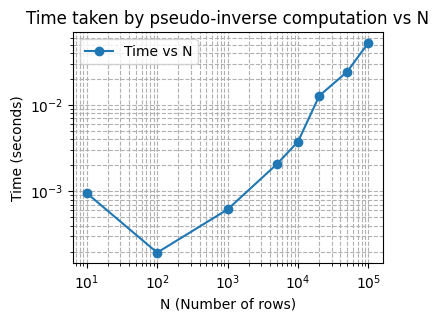

In [61]:
#Plot the graph
plt.figure(figsize=(4, 3))  # Set the figure size
plt.loglog(N_values, times, marker='o', label='Time vs N')  # Log-log plot
plt.xlabel('N (Number of rows)')  # Label for x-axis
plt.ylabel('Time (seconds)')  # Label for y-axis
plt.title('Time taken by pseudo-inverse computation vs N')  # Plot title
plt.grid(True, which="both", ls="--")  # Enable grid for both axes
plt.legend()  # Display the legend
plt.show()  # Display the plot

# 4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.
#Approach:
Steps to Implement:

Step 1: Calculating the squared differences between the target vector t and the predicted vector y.

Step 2: Computing the mean of these squared differences.

Step 3: Taking the square root of the mean to get the RMSE.

Step 4: Normalizing the RMSE by dividing it by the range of the target values (t_max - t_min).

Step 5: Returning the NRMSE value.


In [62]:
#define a function to calculates the Normalized Root Mean Squared Error (NRMSE) between target vector t and predicted vector y.
def find_NRMSE(t, y):
    # Check if the input arrays have the same shape
    if t.shape != y.shape:
        raise ValueError("Input arrays must have the same shape")
    # Calculate the RMSE (Root Mean Squared Error)
    rmse = np.sqrt(np.mean((t - y) ** 2))  # Compute the RMSE

    # Calculate the range of the target vector (max - min)
    t_range = np.max(t) - np.min(t)  # Range of the target values

    # Ensure the range is non-zero to avoid division by zero
    if t_range == 0:
        raise ValueError("The range of the target vector is zero, NRMSE cannot be computed.")

    # Calculate NRMSE by normalizing RMSE with the range
    nrmse = rmse / t_range  # Normalize RMSE

    return nrmse  # Return the NRMSE value


In [63]:
t = np.array([3, 5, 7, 9])  # Example target vector
y = np.array([2.8, 5.1, 6.9, 9.2])  # Example predicted vector

nrmse_value = find_NRMSE(t, y)  # Calculate the NRMSE
print(f"NRMSE: {nrmse_value}")  # Print the NRMSE

NRMSE: 0.02635231383473645


#5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression. Figure out what should be the inputs and outputs.
#Approach:
Steps:

Step 1: Predicted Values:
Computing the predicted values. This gives the predicted output based on the current weights.

Step 2: Residuals:
Calculating the residuals by subtracting the predicted values from the actual target values. This represents the error between the actual values and the predicted values.

Step 3: Gradient Formula:
Using the gradient formula. This formula gives the direction in which the weights should be adjusted to minimize the MSE.

Step 4: Returning Gradient: The output is a gradient vector that will be used to update the weights in optimization algorithms.

In [64]:
#define a function to calculates the gradient of the Mean Squared Error (MSE) with respect to the weights for linear regression.
def find_gradient_MSE(X, y, w):

    # Check if the input arrays have the same shape
    if X.shape[0] != y.shape[0]:
        raise ValueError("Input arrays must have the same number of samples")
    N = X.shape[0]  # Number of samples

    # Step 1: Calculate predicted values (y_cap = Xw)
    y_cap = X @ w  # Predicted values of size Nx1

    # Step 2: Calculate residuals (y - y_cap)
    residuals = y - y_cap  # Residuals vector of size Nx1

    # Step 3: Compute the gradient of MSE with respect to w
    gradient = -(2 / N) * X.T @ residuals  # Gradient of size Dx1

    return gradient  # Return the computed gradient

In [65]:
# Example:
N = 5  # Number of samples
D = 3  # Number of features

X = np.random.randn(N, D)  # Random NxD input matrix
y = np.random.randn(N, 1)  # Random target vector
w = np.random.randn(D, 1)  # Random weight vector

gradient = find_gradient_MSE(X, y, w)  # Compute gradient of MSE
print("Gradient of MSE with respect to weights:\n", gradient) # print gradient of MSE

Gradient of MSE with respect to weights:
 [[-0.41516919]
 [-0.22838504]
 [-2.64098601]]


#6. Write a function to calculate gradient of L2 norm of weights with respect to weights.
#Approach:
Step 1: Calculating the L2 norm of the weight vector
𝑤 using the formula.

Step 2: Computing the gradient using the formula.

Step 3: Handling the case where the norm is zero to avoid division by zero

In [66]:
#def a function to calculates the gradient of the L2 norm of the weights with respect to the weights.
def find_gradient_l2_norm(w):
    #Calculate the L2 norm of the weight vector w
    l2_norm = np.linalg.norm(w)  # L2 norm (Euclidean norm) of the weight vector w

    #Handle the case where the norm is zero to avoid division by zero
    if l2_norm == 0:
        return np.zeros_like(w)  # Return a zero vector if the norm is zero

    #Compute the gradient of the L2 norm with respect to weights
    gradient = w / l2_norm  # Gradient is w divided by the L2 norm

    return gradient  # Return the computed gradient

In [67]:
#Example
w = np.array([11.0, 12.0, 13.0])  # Example weight vector
grad_L2 = find_gradient_l2_norm(w)  # Compute the gradient of the L2 norm
print("Gradient of L2 norm with respect to weights:\n", grad_L2)

Gradient of L2 norm with respect to weights:
 [0.5280169  0.57601843 0.62401997]


# 7. Write a function to calculate gradient of L1 norm of weights with respect to weights.
#Approach:
Step 1: Applying the sign() function to each element in the weight vector
w to compute the gradient.

Step 2: Returning the resulting gradient vector, which can be used in optimization algorithms like Lasso.

In [68]:
#define a function to calculates the gradient of the L1 norm of the weights with respect to the weights.
def find_gradient_L1_norm(w):
    #Apply the sign function to compute the gradient
    gradient = np.sign(w)  # Sign function gives 1, -1, or 0 for each weight

    return gradient  # Return the computed gradient

In [69]:
# Example:
w = np.array([13.0, -12.0, 0.0, 13.5])  # Example weight vector
grad_L1 = find_gradient_L1_norm(w)  # Compute the gradient of the L1 norm
print("Gradient of L1 norm with respect to weights:\n", grad_L1) #print gradient of L1 norm

Gradient of L1 norm with respect to weights:
 [ 1. -1.  0.  1.]


# 8. Write a function to perform gradient descent on MSE + λ1L1 + λ2L2 for linear regression. Use an appropriate stopping criterion.
#Approach:
Steps to Implement:
1. Objective Function:
The total loss function consists of three parts: the Mean Squared Error (MSE), the L1 norm (Lasso regularization), and the L2 norm (Ridge regularization).
The goal of gradient descent is to minimize this combined loss function with respect to the weight vector w.

2. Gradients:

 Gradient of MSE:
This gradient is derived from the difference between the actual target values
y and the predicted values(y_cap), scaled by the number of samples
N.

 Gradient of L1 Regularization (Lasso):
The L1 regularization encourages sparsity in the weight vector
w. The gradient is computed using the sign function, which outputs 1 for positive weights, -1 for negative weights, and 0 for zero weights.

 Gradient of L2 Regularization (Ridge):
The L2 regularization penalizes large weights to prevent overfitting. The gradient is proportional to the weight vector w and the regularization parameter 𝜆2.

3. Combining Gradients:
The total gradient is the sum of three gradients: the gradient of MSE, the L1 regularization gradient (using the sign function), and the L2 regularization gradient (proportional to the weights).


4. Update Rule:
The weights are updated by subtracting the product of the learning rate
α and the total gradient from the current weights. This update is repeated iteratively to minimize the total loss function.


5. Stopping Criterion:
The gradient descent process stops when the change in the weight vector between iterations is smaller than a predefined tolerance value, or when the maximum number of iterations is reached.


In [70]:
#define a function to perform gradient descent to minimize MSE + λ1 * L1 + λ2 * L2 for linear regression.
def find_gradient_descent_mse_l1norm_l2norm(X, y, lambda_1=0.01, lambda_2=0.01, alpha=0.01, tolerance=1e-6, max_iterations=1000):

    N, D = X.shape  # Number of samples (N) and number of features (D)

    w = np.random.randn(D, 1)  # Random initialization of weights
    cost_function = []  # To store cost function values at each iteration

    for iteration in range(max_iterations):
        # Step 1: Predicted values (y_cap = Xw)
        y_cap = X @ w  # Predicted values of size Nx1

        # Step 2: Compute the gradient of the MSE term
        mse_gradient = (-2 / N) * X.T @ (y - y_cap)

        # Step 3: Compute the gradient of the L1 term (sign of weights)
        l1_gradient = lambda_1 * np.sign(w)

        # Step 4: Compute the gradient of the L2 term (2 * lambda_2 * w)
        l2_gradient = 2 * lambda_2 * w

        # Step 5: Total gradient
        total_gradient = mse_gradient + l1_gradient + l2_gradient

        # Step 6: Update weights
        w_new = w - alpha * total_gradient

        # Step 7: Stopping criterion based on tolerance (small change in weights)
        if np.linalg.norm(w_new - w, ord=2) < tolerance:
            print(f"Convergence reached after {iteration} iterations.")
            break

        w = w_new  # Update weights
        cost_function.append(np.linalg.norm(total_gradient))  # Store gradient norm for analysis

    return w, cost_function  # Return the final weights and cost function values

In [71]:
#Example
N = 100  # Number of samples
D = 10   # Number of features
X = np.random.randn(N, D)  # Generate a random NxD feature matrix
y = np.random.randn(N, 1)  # Generate a random target vector

# Perform gradient descent with L1 and L2 regularization
final_weights, gradient_cost_function = find_gradient_descent_mse_l1norm_l2norm(X, y, lambda_1=0.1, lambda_2=0.1, alpha=0.01)
print("function with gradient of MSE, L1 and L2 Regularisation:\n",gradient_cost_function)  # Print the cost function values
print("Final weights:\n", final_weights)  # Print the final weights

function with gradient of MSE, L1 and L2 Regularisation:
 [9.282919576142195, 9.004114097178839, 8.734324307167043, 8.47324582112836, 8.22058472171581, 7.976057197391272, 7.7393891931458425, 7.510316073326105, 7.288582296144503, 7.0739410994667224, 6.866154197483236, 6.664991487885931, 6.4702307691839, 6.281657467805388, 6.09906437464515, 5.922251390728438, 5.751025281674313, 5.585199440652104, 5.42459365953558, 5.269033907969636, 5.118352120074443, 4.972385988521505, 4.817497608721979, 4.681858518234152, 4.550408344263584, 4.423008908797761, 4.299526753882094, 4.179832978687369, 4.06380308219961, 3.9513168113376707, 3.8422580143107226, 3.7365144990343317, 3.6339778964302347, 3.5345435284409916, 3.438110280596643, 3.344580478976173, 3.253859771412084, 3.165857012791721, 3.0804841543140506, 2.99765613656558, 2.9172907862838433, 2.839308716681464, 2.763633231208261, 2.6901902306330996, 2.6189081233313374, 2.5497177386676757, 2.4825522433680587, 2.4173470607779564, 2.3540397929079364, 2.2

#9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the results of the following experiment run five times for each value of σ where G is an identity matrix. Generate a random data matrix X and target vector t with noise variance σ, and split it into training and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ. Comment on the results.
#Commenting on Result:-
Low σ: When noise variance is small (low σ), the model can fit the data well, leading to low NRMSE.

High σ: As noise increases (high σ), the error increases because the noise dominates the true signal, making it harder for the model to generalize(i.e NRMSE increases).
#Approach:-
1. Data Generation:

  Write a function to generate a random data matrix X and a target vector t, with Gaussian noise variance σ.
  Use matrix operations (numpy) for data generation.

2. Train-Validation Split:

  Spliting the dataset into training (80%) and validation (20%) sets using train_test_split from sklearn or manually using numpy if sklearn is not allowed.

3. Gradient Descent:

  Implementing gradient descent to train the linear regression model on the training set.
  Update the weight vector iteratively by minimizing Mean Squared Error (MSE) loss using basic matrix operations (numpy).

4. NRMSE Calculation:

  Calculating NRMSE on the validation set using RMSE normalized by the range of the target values in the validation set.

5. Experiment Setup:

  Varying the noise variance (σ) across different values (e.g., σ=0.1,0.5,1.0,2.0,5.0,10.0).
  Run the experiment five times for each σ to compute the average NRMSE over multiple runs.

6. Plotting:

  Plotting the average NRMSE vs. σ using matplotlib with properly labeled axes and titles.
  Provide critical insights in text cells, observing how noise affects NRMSE.


In [72]:
# Function to generate random data with noise
# m: number of data points, n: number of features, sigma: noise variance
def generate_data(m, n, sigma):

    X = np.random.randn(m, n)  # Generate a random matrix X of shape (m, n)
    w_true = np.random.randn(n)  # Generate true weights w_true of shape (n,1)
    noise = sigma * np.random.randn(m)  # Generate random Gaussian noise with variance sigma(m,1)
    t = X @ w_true + noise  # Compute the target vector t as X @ w_true + noise
    return X, t  # Return the data matrix X and target vector t


In [73]:
# Function to implement gradient descent for linear regression
# X: input matrix, t: target vector, learning_rate: step size, iterations: number of steps
def find_gradient_descent(X, t, learning_rate=0.01, iterations=1000):
    m, n = X.shape  # Get the number of data points (m) and features (n)
    w = np.random.randn(n)  # Initialize the weights randomly
    for i in range(iterations):
        predictions = X @ w  # Calculate predictions based on current weights
        gradient = (1/m) * X.T @ (predictions - t)  # Compute the gradient of the MSE loss
        w = w - learning_rate * gradient  # Update the weights by taking a step in the direction of the negative gradient
    return w  # Return the final learned weights


In [74]:
# Function to calculate the Normalized Root Mean Squared Error (NRMSE)
# X_val: validation data matrix, t_val: validation target vector, w: learned weights
def compute_nrmse(X_val, t_val, w):
    predictions = X_val @ w  # Calculate predictions for the validation set using learned weights
    rmse = np.sqrt(np.mean((t_val - predictions) ** 2))  # Compute the RMSE (Root Mean Squared Error)
    nrmse = rmse / (np.max(t_val) - np.min(t_val))  # Normalize RMSE by the range of t_val to compute NRMSE
    return nrmse  # Return the NRMSE value


In [75]:
# List of noise variances to test
sigmas = [0.1, 0.5, 1.0, 1.5, 3.0, 5.0, 7.0, 10]  # Noise levels (sigma) for the experiments
avg_nrmse = []  # List to store average NRMSE for each sigma value


In [76]:
# Loop over different values of sigma to calculate average NRMSE for each
for sigma in sigmas:
    nrmse_vals = []  # Temporary list to store NRMSE values for each run at the current sigma level
    for j in range(5):  # Repeat the experiment 5 times for averaging
        X, t = generate_data(m=100, n=10, sigma=sigma)  # Generate data with the current sigma

        # Split data into training and validation sets (80% train, 20% validation)
        split_index = int(0.8 * len(X))  # Compute split index based on 80% training data
        X_train, X_validation = X[:split_index], X[split_index:]  # Split features into training and validation sets
        t_train, t_validation = t[:split_index], t[split_index:]  # Split target into training and validation sets

        # Train the linear regression model using gradient descent
        w = find_gradient_descent(X_train, t_train)  # Learn weights from the training set

        # Compute NRMSE on the validation set
        nrmse = compute_nrmse(X_validation, t_validation, w)  # Calculate NRMSE for the validation set
        nrmse_vals.append(nrmse)  # Store the NRMSE value for this run

    avg_nrmse.append(np.mean(nrmse_vals))  # Compute the average NRMSE over 5 runs for the current sigma value


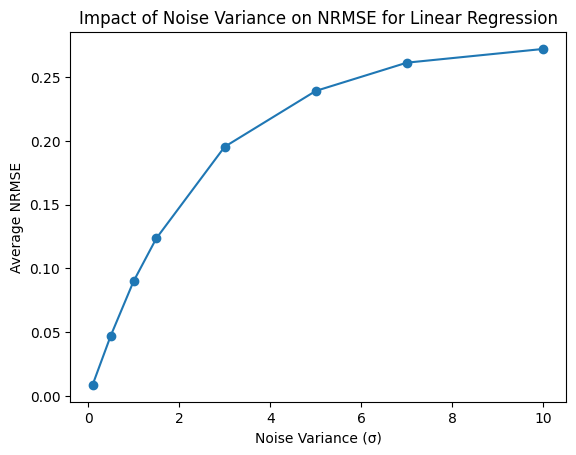

In [77]:
# Plot the average NRMSE versus sigma (noise variance)
plt.plot(sigmas, avg_nrmse, marker='o')  # Create a line plot with points for each sigma
plt.xlabel('Noise Variance (σ)')  # Label the x-axis as noise variance
plt.ylabel('Average NRMSE')  # Label the y-axis as average NRMSE
plt.title('Impact of Noise Variance on NRMSE for Linear Regression')  # Title of the plot
plt.show()  # Display the plot


#10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent. Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and noise variance σ. Comment on the results.

#Approach to Solve:
1. Generate Data:
 Using a fixed generator matrix G to generate input data X and a noise variance σ to add noise to the target variable t.
2.Run Gradient Descent:
Implementing a linear regression model using gradient descent with L2 regularization (Ridge regression).
3. Experiment Setup:Creating lists of
N (number of samples) and
𝜆2(L2 regularization values) in a log scale with 5 values for each.
For each combination of
N and
λ2, run the experiment five times and average the results.
4. Compute NRMSE:
Computing the Normalized Root Mean Squared Error (NRMSE) for each combination of
N and
λ2.
5. Visualizing and Commenting on Results:
Analyzing the results and comment on how varying
N and λ2 affects the NRMSE.

#Comment:
1. Impact of
N (Number of Samples):
As
N increases, the NRMSE generally decreases because the model has more data to learn from, which improves generalization and prediction accuracy.
Impact of

2. λ2(L2 Regularization):
For small λ2, there may be overfitting, leading to lower NRMSE, but very large
λ2 values can cause underfitting, resulting in a higher NRMSE.
Moderate λ2 values tend to balance regularization and model complexity, leading to optimal performance with low NRMSE.



In [78]:
# Define a Function to Generate input data X and target vector t with noise.
#  Parameters:
#     N (int): Number of samples.
#     D (int): Number of features.
#     G (np.array): Generator matrix (MxD).
#     sigma (float): Noise variance.
def generate_data(N, D, G, sigma):
    M = G.shape[0] #extract no of rows in G matrix
    R = np.random.randn(N, M)  # Generate random samples from standard normal distribution
    X = R @ G  # Multiply by generator matrix G
    t = X @ np.random.randn(D, 1) + np.random.normal(0, sigma, (N, 1))  # Generate noisy target
    return X, t  # Return the input data X and target vector t

In [79]:
#Experiment setup
D = 10  # Number of features (D). This defines how many features each data point has (i.e., the dimensionality of the input data).

G = np.eye(D)  # Fixed generator matrix G, which is an identity matrix of size DxD. This matrix will be used to generate the input data. The identity matrix is chosen for simplicity, ensuring the features remain independent in the generated data.

sigma = 0.1  # Noise variance (sigma). This controls the level of noise added to the target variable. The higher the noise variance, the more random noise will be added to the data.

N_values = np.logspace(1, 4, 5, dtype=int)  # Generate 5 values for the number of samples (N) on a log scale.
# This creates an array of N values: [10, 100, 1000, 10000, 100000].
# np.logspace(start, stop, num, dtype) generates numbers spaced evenly on a log scale between 10^start and 10^stop.

lambda_2_values = np.logspace(-2, 2, 5)  # Generate 5 values for lambda_2 (L2 regularization parameter) on a log scale.
# This creates an array of lambda_2 values: [0.01, 0.1, 1, 10, 100].
# np.logspace(-2, 2, 5) generates values from 10^-2 to 10^2, distributed evenly on a logarithmic scale.

nrmse_results = np.zeros((len(N_values), len(lambda_2_values)))  # Initialize a matrix to store the NRMSE results for each combination of N and lambda_2.
# np.zeros creates a matrix of zeros with dimensions equal to (number of N values, number of lambda_2 values), i.e., a 5x5 matrix.
# This matrix will later be filled with the average NRMSE results for each pair of N and lambda_2 values.


In [80]:
# Run the experiment 5 times for each pair of N and lambda_2
for i, N in enumerate(N_values):  # Loop over each value of N (number of samples) in N_values
    for j, lambda_2 in enumerate(lambda_2_values):  # Loop over each value of lambda_2 in lambda_2_values
        nrmse_list = []  # Initialize an empty list to store NRMSE values for this combination of N and lambda_2

        for _ in range(5):  # Run the experiment 5 times for each combination of N and lambda_2 to average the results
            X, t = generate_data(N, D, G, sigma)  # Generate input data X and target t using the generator matrix G, noise variance sigma, and number of samples N
            w,cost_function = find_gradient_descent_mse_l1norm_l2norm(X, t, lambda_1=0.00, lambda_2=0.01, alpha=0.01, tolerance=1e-6, max_iterations=1000)  # Run gradient descent to obtain the optimized weights w for the current lambda_2 value
            nrmse = compute_nrmse(X, t, w)  # Calculate the NRMSE for the current combination of X, t, and w
            nrmse_list.append(nrmse)  # Append the calculated NRMSE to the list

        nrmse_results[i, j] = np.mean(nrmse_list)  # Average the NRMSE results from the 5 runs and store the result in nrmse_results


Convergence reached after 972 iterations.
Convergence reached after 894 iterations.
Convergence reached after 938 iterations.
Convergence reached after 940 iterations.
Convergence reached after 940 iterations.
Convergence reached after 954 iterations.
Convergence reached after 901 iterations.
Convergence reached after 792 iterations.
Convergence reached after 870 iterations.
Convergence reached after 653 iterations.
Convergence reached after 715 iterations.
Convergence reached after 624 iterations.
Convergence reached after 636 iterations.
Convergence reached after 690 iterations.
Convergence reached after 591 iterations.
Convergence reached after 685 iterations.
Convergence reached after 634 iterations.
Convergence reached after 666 iterations.
Convergence reached after 751 iterations.
Convergence reached after 661 iterations.
Convergence reached after 585 iterations.
Convergence reached after 640 iterations.
Convergence reached after 626 iterations.
Convergence reached after 635 iter

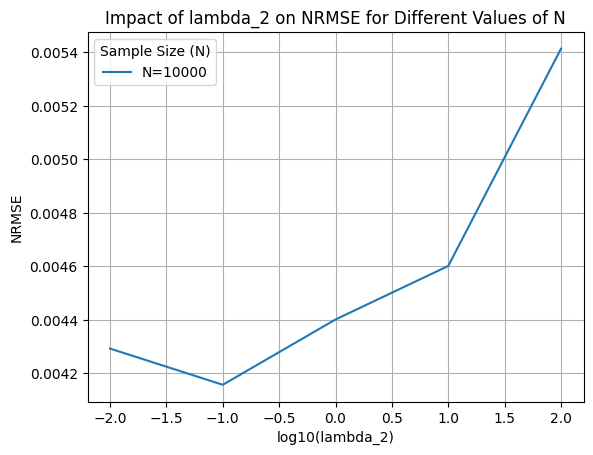

In [81]:
 plt.plot(np.log10(lambda_2_values), nrmse_results[i, :], label=f'N={N}')  # Plot each line for a specific N

plt.xlabel('log10(lambda_2)')  # Label the x-axis as 'log10(lambda_2)', showing the log scale of lambda_2 values
plt.ylabel('NRMSE')  # Label the y-axis as 'NRMSE' to indicate the plotted values
plt.title('Impact of lambda_2 on NRMSE for Different Values of N')  # Set the title of the plot
plt.legend(title='Sample Size (N)')  # Add a legend to show which line corresponds to which N
plt.grid(True)  # Add gridlines for better readability
plt.show()  # Display the plot

#11. Examine the impact of λ1 on variable elimination. Generate a single data matrix Xand plotweights versus 1/λ1. Comment on the results. Introduce correlations in the columns of Xand repeatthe experiment. Are the results different? Comment on the results.
#Approach to Solve:
1. Generating Independent Data Matrix X
2. Run Lasso Regression and Plotting Weights vs
1/λ1
3. Generating Correlated Data Matrix 𝑋
4. Run Lasso Regression with Correlated Data and Plot Weights vs
1/λ1



#Comment on Result:-
1. For Independent Features:
As
λ1 increases (i.e., as
1/𝜆1
  decreases), more variables are eliminated, with their corresponding weights shrinking to zero. This demonstrates the variable selection ability of Lasso.
2. For Correlated Features:
When features are correlated, Lasso may struggle to eliminate variables cleanly because it is harder to distinguish between features that carry redundant information. This may result in fewer weights being set to zero, or more erratic elimination of variables compared to the independent feature case.

In [82]:
from sklearn.linear_model import Lasso  # For performing Lasso regression (L1 regularization)
# Function to generate a data matrix X with independent features
def gen_indep_data(N, D):
    """
    Generate independent data matrix X and target vector t.
    N: number of samples
    D: number of features
    """
    X = np.random.randn(N, D)  # Generate random normal distribution for independent features
    t = X @ np.random.randn(D, 1) + np.random.randn(N, 1) * 0.1  # Create target t by multiplying X with random weights and adding noise
    return X, t  # Return the independent feature matrix X and the target vector t

# Parameters for the experiment
N = 100  # Number of samples
D = 10   # Number of features

# Generate independent data for the experiment
X_indep, t_indep = gen_indep_data(N, D)  # X is the data matrix, t is the target vector

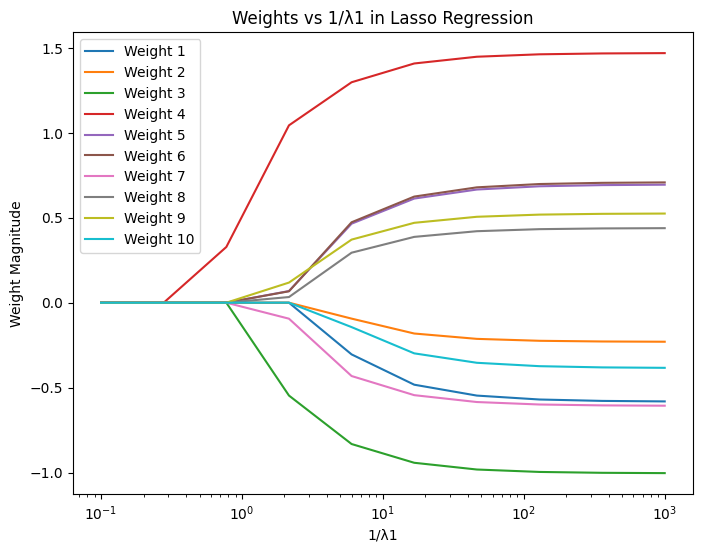

In [83]:
# Function to run Lasso regression and plot weights vs 1/λ1
def lasso(X, t, lambda_1_values):
    """
    Run Lasso regression for different values of λ1 and plot weights vs 1/λ1.
    X: input data matrix
    t: target vector
    lambda_1_values: list of λ1 values to test
    """
    weights_list = []  # List to store the learned weights for each λ1 value

    # Loop over each λ1 value and run Lasso regression
    for lambda_1 in lambda_1_values:
        lasso = Lasso(alpha=lambda_1, max_iter=10000)  # Create a Lasso regression model with regularization λ1
        lasso.fit(X, t.ravel())  # Fit the Lasso model to the data. 't.ravel()' flattens the target to a 1D array.
        weights_list.append(lasso.coef_)  # Append the learned weights (coefficients) to the list

    # Convert weights_list to a numpy array for easier plotting
    weights_array = np.array(weights_list)

    # Plot the learned weights vs 1/λ1
    plt.figure(figsize=(8, 6))  # Create a figure for the plot
    for i in range(weights_array.shape[1]):  # Loop over each feature (column of weights)
        plt.plot(1 / lambda_1_values, weights_array[:, i], label=f'Weight {i+1}')  # Plot each feature's weights vs 1/λ1
    plt.xscale('log')  # Set the x-axis to logarithmic scale for 1/λ1
    plt.xlabel('1/λ1')  # Label the x-axis
    plt.ylabel('Weight Magnitude')  # Label the y-axis
    plt.title('Weights vs 1/λ1 in Lasso Regression')  # Set the title of the plot
    plt.legend()  # Show legend indicating which line corresponds to which weight
    plt.show()  # Display the plot

# Define a list of λ1 values (regularization strengths) on a log scale
lambda_1_values = np.logspace(-3, 1, 10)  # λ1 values from 0.001 to 10, evenly spaced on a log scale

# Run Lasso regression and plot weights vs 1/λ1 for the independent data
lasso(X_indep, t_indep, lambda_1_values)  # Perform experiment for independent features

In [84]:
# Function to generate a data matrix X with correlated features
def generate_correlated_data(N, D, correlation_strength=0.8):
    """
    Generate correlated data matrix X and target vector t.
    N: number of samples
    D: number of features
    correlation_strength: strength of correlation between features (0 = no correlation, 1 = full correlation)
    """
    X = np.random.randn(N, D)  # Generate independent features first
    correlation_matrix = np.eye(D) * (1 - correlation_strength) + correlation_strength  # Create a correlation matrix with the given strength
    X = X @ correlation_matrix  # Introduce correlations by multiplying X with the correlation matrix
    t = X @ np.random.randn(D, 1) + np.random.randn(N, 1) * 0.1  # Generate the target vector t with noise
    return X, t  # Return the correlated feature matrix X and the target vector t

# Generate correlated data for the experiment
X_corr, t_corr = generate_correlated_data(N, D)  # Generate data with correlated features

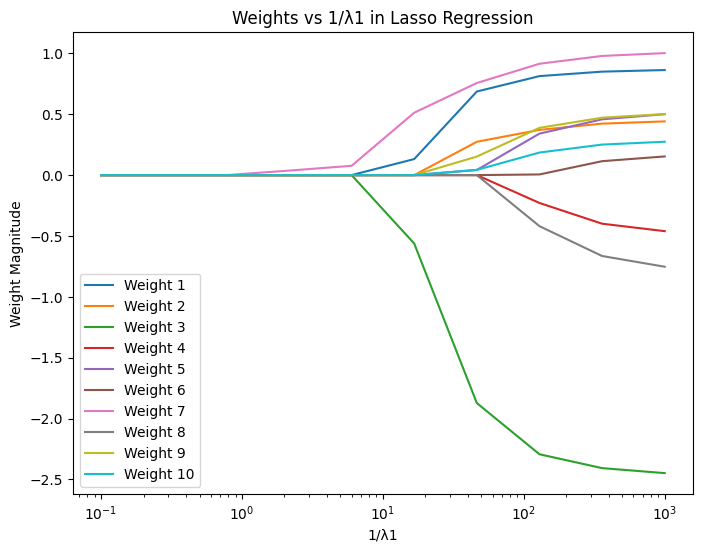

In [85]:
# Run Lasso regression and plot weights vs 1/λ1 for the correlated data
lasso(X_corr, t_corr, lambda_1_values)  # Perform experiment for correlated features

#12. Show the grouping effect of elastic net on correlated columns of X.
#Approach to Solve:
Step 1: Generating correlated data matrix X

Step 2: Run Elastic Net regression and plot weights vs 1/λ

Step 3: Generating correlated data for the experiment

Step 4: Running Elastic Net regression and plot the results
#Comments on Result:
 Grouping Effect in Elastic Net: Elastic Net has the ability to group correlated variables together. In cases where features are highly correlated, Elastic Net tends to either select or exclude them as a group, rather than selecting one feature while eliminating others (as Lasso might do).

 In the Plot: In the plot of weights vs 1/λ, you should observe that weights of correlated features follow similar trends, indicating that Elastic Net is treating them as a group. As λ increases, the weights shrink together or remain non-zero together, demonstrating the grouping effect.

In [86]:
from sklearn.linear_model import ElasticNet  # For performing Elastic Net regression

In [87]:
#define a function to generate correlated data
def correlated_data(N, D, correlation_strength=0.8):
    """
    Generate correlated data matrix X and target vector t.
    N: Number of samples
    D: Number of features
    correlation_strength: Strength of correlation between features (0 = no correlation, 1 = full correlation)
    """
    X = np.random.randn(N, D)  # Generate independent random features from a normal distribution
    correlation_matrix = np.eye(D) * (1 - correlation_strength) + correlation_strength  # Create a correlation matrix
    X = X @ correlation_matrix  # Multiply the independent features by the correlation matrix to introduce correlations
    t = X @ np.random.randn(D, 1) + np.random.randn(N, 1) * 0.1  # Generate the target vector t by applying random weights and adding noise
    return X, t  # Return the correlated feature matrix X and the target vector t

In [88]:
#define a function to run elastic net experiment
def elastic_net_exp(X, t, lambda_values, alpha=0.5):
    """
    Run Elastic Net regression for different values of λ and plot weights vs 1/λ.
    X: Input data matrix
    t: Target vector
    lambda_values: List of λ values to test
    alpha: Mixing parameter between L1 and L2 (alpha=0 is Ridge, alpha=1 is Lasso)
    """
    weights_list = []  # List to store the learned weights for each λ value

    # Loop over each λ value and run Elastic Net regression
    for lambda_val in lambda_values:
        elastic_net = ElasticNet(alpha=lambda_val, l1_ratio=alpha, max_iter=10000)  # Create an Elastic Net model with L1/L2 regularization
        elastic_net.fit(X, t.ravel())  # Fit the Elastic Net model to the data (t.ravel() flattens the target to 1D array)
        weights_list.append(elastic_net.coef_)  # Append the learned weights (coefficients) to the list

    # Convert weights_list to a numpy array for easier plotting
    weights_array = np.array(weights_list)

    # Plot the learned weights vs 1/λ
    plt.figure(figsize=(8, 6))  # Create a figure for the plot
    for i in range(weights_array.shape[1]):  # Loop over each feature (column of weights)
        plt.plot(1 / lambda_values, weights_array[:, i], label=f'Weight {i+1}')  # Plot each feature's weights vs 1/λ
    plt.xscale('log')  # Set the x-axis to logarithmic scale for 1/λ
    plt.xlabel('1/λ')  # Label the x-axis
    plt.ylabel('Weight Magnitude')  # Label the y-axis
    plt.title('Weights vs 1/λ in Elastic Net Regression')  # Set the title of the plot
    plt.legend()  # Show legend indicating which line corresponds to which weight
    plt.show()  # Display the plot

In [89]:
# Experiment parameters
N = 100  # Number of samples
D = 10   # Number of features
lambda_values = np.logspace(-3, 1, 10)  # λ values from 0.001 to 10, evenly spaced on a log scale
alpha = 0.5  # Mixing parameter (0.5 means equal balance between L1 and L2 regularization)

In [90]:
X_corr, t_corr = correlated_data(N, D)  # Generate data with correlated features


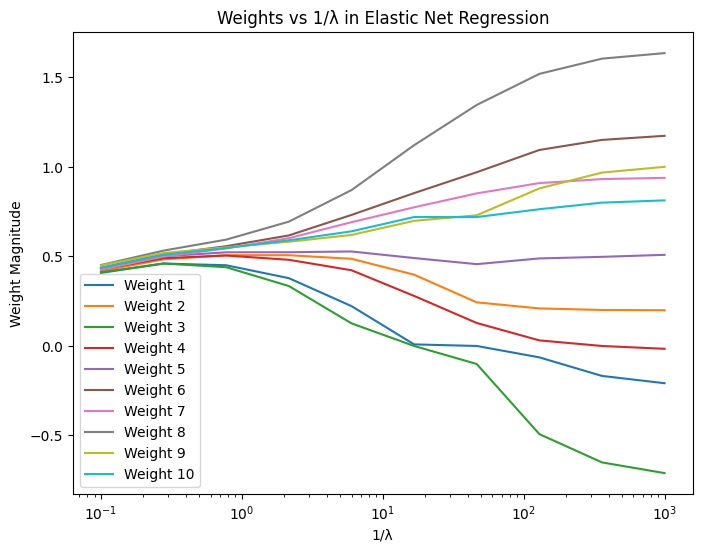

In [91]:
elastic_net_exp(X_corr, t_corr, lambda_values, alpha)  # Run the experiment with Elastic Net

#13. Write a function for generating linear binary classification vector t with noise variance σ.
#Approach to Solve:-
1. This function demonstrates how to generate binary classification data with added noise before applying the sigmoid function. The added noise makes the classification task more challenging and realistic.

2. The sigmoid function squashes the noisy linear function output into probabilities, and a threshold is used to classify the data into two classes (binary classification).

In [92]:
# Sigmoid function to squash the values into the range [0, 1]
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [93]:
# Function to generate binary classification vector t with noise
def binary_classi_data(N, D, sigma=0.1):
    """
    Generate binary classification vector t with added noise before applying sigmoid.
    N: Number of samples
    D: Number of features
    sigma: Noise variance to be added to the linear function
    """
    # Step 1: Generate random feature matrix X
    X = np.random.randn(N, D)  # Random normal distribution for features

    # Step 2: Generate random weight vector w for linear combination
    w = np.random.randn(D, 1)  # Random weight vector

    # Step 3: Calculate linear combination of features
    linear_output = X @ w  # Linear combination (X * w)

    # Step 4: Add Gaussian noise to the linear output
    noisy_output = linear_output + np.random.normal(0, sigma, size=(N, 1))  # Add noise with variance sigma

    # Step 5: Apply sigmoid function to get probabilities
    probabilities = sigmoid(noisy_output)  # Apply sigmoid to the noisy output

    # Step 6: Generate binary classification vector t based on the probabilities
    t = (probabilities >= 0.5).astype(int)  # If probability >= 0.5, assign class 1, otherwise class 0

    return X, t  # Return the feature matrix X and the binary classification vector t

In [94]:
# Example parameters
N = 100  # Number of samples
D = 5    # Number of features
sigma = 0.2  # Noise variance

# Generate binary classification data
X, t = binary_classi_data(N, D, sigma)

# Print first 5 samples of the generated feature matrix and the corresponding binary labels
print("Feature matrix (first 5 samples):")
print(X[:5])
print("\nBinary classification vector (first 5 samples):")
print(t[:5])


Feature matrix (first 5 samples):
[[-0.27423939  1.46424516 -0.63231248  1.28258319  0.71431569]
 [-1.41548526  0.65930566 -0.09023384  0.53776055 -0.47162393]
 [ 2.02033902 -2.28684678  0.51620815 -0.01179908 -1.06952072]
 [-1.26093627  0.96757463  2.44806844 -0.32935579 -0.80593638]
 [ 0.51407391 -0.3117538   1.48695445  0.5521547  -1.05760767]]

Binary classification vector (first 5 samples):
[[0]
 [0]
 [1]
 [1]
 [1]]


#14. Write a function for computing gradient of binary cross-entropy for logistic regression.

#Approach to Solve:-
1. Sigmoid Function:

 The sigmoid function is used to convert the linear combination of features into probabilities for binary classification. The sigmoid squashes the values into the range [0, 1], representing the probability of class 1.
2. Computing Predicted Probabilities:

 Multiply the input feature matrix
X by the weight vector
w to get the linear combination of features. Apply the sigmoid function to this linear output to compute the predicted probabilities
y_cap.
3. Calculating Error:

 Compute the difference between the predicted probabilities
y_cap
  and the true binary labels
t. This difference represents the error in prediction.

4. Computing Gradient of Binary Cross-Entropy Loss:

 The gradient is calculated as
(1/
N)*X^T
 (
y_cap − t), where
N is the number of samples,
X^T
  is the transpose of the feature matrix, and
y_cap − t is the error vector.
This gradient provides the direction in which the weights need to be adjusted to minimize the binary cross-entropy loss.
5. Returning Gradient:

  The computed gradient is returned, which will be used in optimization algorithms like gradient descent to update the weight vector during model training.

In [95]:
# Function to compute the gradient of binary cross-entropy for logistic regression
def find_grad_binary_crossentropy(X, t, w):
    """
    Compute the gradient of binary cross-entropy loss with respect to the weight vector w.
    X: input feature matrix (N x D)
    t: true binary labels (N x 1)
    w: weight vector (D x 1)
    Returns the gradient of shape (D x 1).
    """
    N = X.shape[0]  # Number of samples (rows in the matrix X)

    # Step 1: Compute the predicted probabilities using the sigmoid function
    y_pred = sigmoid(X @ w)  # Linear combination of X and w, followed by sigmoid

    # Step 2: Compute the error between predicted probabilities and true labels
    error = y_pred - t  # Difference between predicted probabilities and actual labels

    # Step 3: Compute the gradient of the binary cross-entropy loss
    gradient = (1 / N) * X.T @ error  # Gradient calculation: X^T * (y_pred - t), scaled by 1/N

    return gradient  # Return the gradient vector

In [97]:
# Example parameters
N = 100  # Number of samples
D = 5    # Number of features
X = np.random.randn(N, D)  # Random feature matrix
t = (np.random.rand(N, 1) > 0.5).astype(int)  # Random binary labels (0 or 1)
w = np.random.randn(D, 1)  # Random initial weights

# Compute the gradient of binary cross-entropy
gradient = find_grad_binary_crossentropy(X, t, w)

# Output the computed gradient
print("Computed gradient of binary cross-entropy loss:")
print(gradient)


Computed gradient of binary cross-entropy loss:
[[-0.17076179]
 [ 0.01982476]
 [-0.15748798]
 [-0.04216809]
 [-0.1113629 ]]


#15. Repeat experiment 10 for binary classification.
#Approach to solve:
1. Generating Binary Classification Data
2. Running Logistic Regression with L2 Regularization
3. Creating Lists of
𝑁 and 𝜆2
4. Evaluating Binary Classification Performance
5. Plotting the Results and Analyze

#Comments on Results:

1. Impact of N (Number of Samples):

 As
N increases, the binary cross-entropy loss generally decreases because the model has more data to learn from, resulting in better generalization and prediction.
Impact of
λ2
2. (L2 Regularization):

 Small values of
λ2(weak regularization) might lead to overfitting, while very large
λ2 values (strong regularization) could cause underfitting, both resulting in higher cross-entropy loss.
Moderate values of
λ2 usually achieve the best balance between regularization and model performance.
3. Overall Trends:

 As
N increases and a moderate
λ2
  is used, the cross-entropy loss should be minimized, demonstrating good model performance. Extreme values of
λ2
  tend to worsen the results due to over-regularization or lack of regularization.

In [98]:
# Function to compute binary cross-entropy loss
def binary_cross_entropy_loss(y_pred, t):
    """
    Compute binary cross-entropy loss.
    y_pred: Predicted probabilities
    t: True binary labels
    """
    return -np.mean(t * np.log(y_pred + 1e-8) + (1 - t) * np.log(1 - y_pred + 1e-8))

In [99]:
# Function to generate binary classification data
def binary_classi_data(N, D, G, sigma=0.1):
    """
    Generate binary classification data with noise.
    N: Number of samples
    D: Number of features
    G: Generator matrix
    sigma: Noise variance
    """
    M = G.shape[0]
    R = np.random.randn(N, M)  # Generate random matrix for features
    X = R @ G  # Generate input features using generator matrix G
    linear_output = X @ np.random.randn(D, 1)  # Linear combination of features
    noisy_output = linear_output + np.random.normal(0, sigma, size=(N, 1))  # Add Gaussian noise
    probabilities = sigmoid(noisy_output)  # Apply sigmoid function
    t = (probabilities >= 0.5).astype(int)  # Threshold probabilities to generate binary labels
    return X, t


In [100]:
# Experiment setup
D = 10  # Number of features
G = np.eye(D)  # Fixed generator matrix (identity matrix)
sigma = 0.1  # Noise variance
N_values = np.logspace(1, 4, 5, dtype=int)  # Log-scale N values [10, 100, 1000, 5000, 10000]
lambda_2_values = np.logspace(-2, 2, 5)  # Log-scale lambda_2 values [0.01, 0.1, 1, 10, 100]
results = np.zeros((len(N_values), len(lambda_2_values)))  # To store the average cross-entropy results

In [101]:
#define a function to perform gradient descent to minnimise binary cross-entropy + L2 Regularlisation
def grad_descent1(X, t, lambda_2, alpha=0.01, tolerance=1e-6, max_iterations=1000):
    """
    Perform gradient descent to minimize binary cross-entropy + L2 regularization.
    X: Input feature matrix
    t: True binary labels
    lambda_2: L2 regularization parameter
    alpha: Learning rate
    tolerance: Convergence tolerance
    max_iterations: Maximum number of iterations for gradient descent
    """
    N, D = X.shape #Get number of samples and features
    w = np.random.randn(D, 1)  # Initialize weights randomly
    for iteration in range(max_iterations):
        y_pred = sigmoid(X @ w)  # Compute predicted probabilities using the sigmoid function
        error = y_pred - t  # Compute the error between predictions and true labels
        gradient = (1 / N) * X.T @ error + 2 * lambda_2 * w  # Gradient of cross-entropy + L2 regularization
        w_new = w - alpha * gradient  # Update weights
        if np.linalg.norm(w_new - w, ord=2) < tolerance:  # Convergence check
            break  #break from this loop
        w = w_new  # Update weights for the next iteration
    return w #return updated weight


In [102]:
# Run the experiment 5 times for each pair of N and lambda_2
for i, N in enumerate(N_values):
    for j, lambda_2 in enumerate(lambda_2_values):
        cross_entropy_list = []
        for _ in range(5):  # Run experiment 5 times for each pair
            X, t = binary_classi_data(N, D, G, sigma)  # Generate binary classification data
            w = grad_descent1(X, t, lambda_2)  # Perform gradient descent for logistic regression
            y_pred = sigmoid(X @ w)  # Compute the predicted probabilities
            cross_entropy = binary_cross_entropy_loss(y_pred, t)  # Calculate binary cross-entropy loss
            cross_entropy_list.append(cross_entropy)  # Store the loss
        results[i, j] = np.mean(cross_entropy_list)  # Average cross-entropy over 5 runs

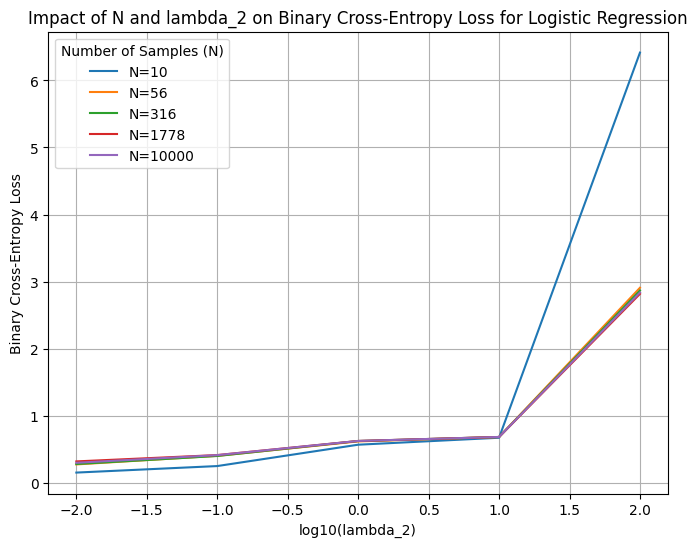

In [103]:
# Plot the results using a line plot to visualize the binary cross-entropy loss for different lambda_2 values
plt.figure(figsize=(8, 6))  # Create a figure with a size of 8x6 inches

# Loop through each N value and plot its corresponding results against lambda_2 values
for i, N in enumerate(N_values):
    plt.plot(np.log10(lambda_2_values), results[i, :], label=f'N={N}')  # Plot line for each N

plt.xlabel('log10(lambda_2)')  # Label the x-axis as 'log10(lambda_2)'
plt.ylabel('Binary Cross-Entropy Loss')  # Label the y-axis as 'Binary Cross-Entropy Loss'
plt.title('Impact of N and lambda_2 on Binary Cross-Entropy Loss for Logistic Regression')  # Set the title of the plot
plt.legend(title='Number of Samples (N)')  # Add a legend to indicate which line corresponds to which N
plt.grid(True)  # Add gridlines for better readability
plt.show()  # Display the plot

#References:
1. I used chatgpt to understanding and solving this assignment

  Following Prompt are Used to solve this Assignment Problems:
  
  a. Explain this problem "Write question from Assignment sheet" and Give me
     approach how I solve this problem.

  b. Explain me this Gradient function in summary format.

  c. Help me in debugging this code.

  d. I didn't understand this question "Write Question" Elbaorate in detail and
     give me other method to solve this problem.

  e. Comment all line of code.

  f. Explain me this code.

  g. how to perform dot product of two matrix in numpy.

2. I used this documentation "https://scikit-learn.org/stable/supervised_learning.html".


3. I used this Website sometimes for understanding of code and questions "https://www.geeksforgeeks.org/ml-logistic-regression-using-python/".

4. I used chatgpt in following functions
  to understand and debugging:-
  
    target_vector, pseudo_inverse_time, find_NRMSE, find_gradient_MSE, find_gradient_l2_norm, find_gradient_L1_norm, find_gradient_descent_mse_l1norm_l2norm, generate_data,find_gradient_descent, compute_nrmse, gen_indep_data, lasso, correlated_data, elastic_net_exp, binary_classi_data, find_grad_crossentropy, binary_cross_entropy_loss, binary_classi_da

